In [4]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree

import matplotlib.pyplot as plt

ImportError: cannot import name cbook

In [5]:
# load training dataset
TRAINING_FILE = '../data/model.dat'
TRAINING_DATA = pd.read_csv(TRAINING_FILE)
TRAINING_DATA.head()

,Class,Followers,Friends,Statuses,Favories,Lists
0,INFLUENCER,17694,485,5793,156,129
1,RETWEETER,4074,3473,71206,76912,48
2,RETWEETER,692,617,61395,35384,28
3,RETWEETER,57,135,897,1350,1
4,RETWEETER,598,841,35591,34109,20


In [6]:
# assign x, y
X = TRAINING_DATA.values[:, 1:]
Y = TRAINING_DATA.values[:, 0]

# assign classes, features
class_names = list(TRAINING_DATA['Class'].unique())
feature_names = list(TRAINING_DATA.columns.values)[1:]

In [7]:
# create test / train model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

# init classifier
clf = RandomForestClassifier(n_jobs = -1, 
                             criterion = 'entropy', 
                             random_state = 42, 
                             max_depth = 5, 
                             min_samples_leaf = 5)

In [8]:
# find best n_estimator
estimators = np.arange(1, 50, 1)
scores = []

for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test, Y_test))

scores = np.array(scores)
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores)
plt.show()

NameError: name 'plt' is not defined

In [9]:
# set best n_estimator
n_estimators = np.where(scores == scores.max())[0][0] + 1
print 'N-Estimator', ' | Score: %.5f', scores.max()

N-Estimator %s | Score: %.5f 8 0.554054054054


In [532]:
clf.set_params(n_estimators = n_estimators)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [533]:
# predict test
predict = clf.predict(X_test)
predict

array(['RETWEETER', 'BOT', 'RETWEETER', 'NORMAL', 'BOT', 'NORMAL',
       'NORMAL', 'NORMAL', 'ACTIVE', 'ACTIVE', 'BOT', 'BOT', 'BOT', 'BOT',
       'NORMAL', 'BOT', 'ACTIVE', 'SUPER USER', 'NORMAL', 'RETWEETER',
       'BOT', 'RETWEETER', 'BOT', 'NORMAL', 'BOT', 'NORMAL', 'BOT',
       'NORMAL', 'NORMAL', 'NORMAL', 'RETWEETER', 'RETWEETER', 'BOT',
       'ACTIVE', 'NORMAL', 'BOT', 'BOT', 'NORMAL', 'NORMAL', 'ACTIVE',
       'NORMAL', 'BOT', 'ACTIVE', 'BOT', 'RETWEETER', 'NORMAL',
       'RETWEETER', 'BOT', 'RETWEETER', 'RETWEETER', 'NORMAL', 'BOT',
       'BOT', 'ACTIVE', 'NORMAL', 'INFLUENCER', 'NORMAL', 'BOT', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'RETWEETER', 'BOT', 'NORMAL',
       'NORMAL', 'ACTIVE', 'RETWEETER', 'NORMAL', 'BOT', 'RETWEETER',
       'RETWEETER', 'BOT', 'SUPER USER'], dtype=object)

In [534]:
# accuracy
print 'Accuracy:', accuracy_score(Y_test, predict)*100

Accuracy: 55.4054054054


In [458]:
import graphviz
g = []
for tree_in_forest in clf.estimators_:
    dot_data = tree.export_graphviz(tree_in_forest, out_file = None, filled = True, leaves_parallel = True,
                                class_names = class_names,
                                feature_names = feature_names,
                                special_characters = True)
    graph = graphviz.Source(dot_data)
    g.append(graph)

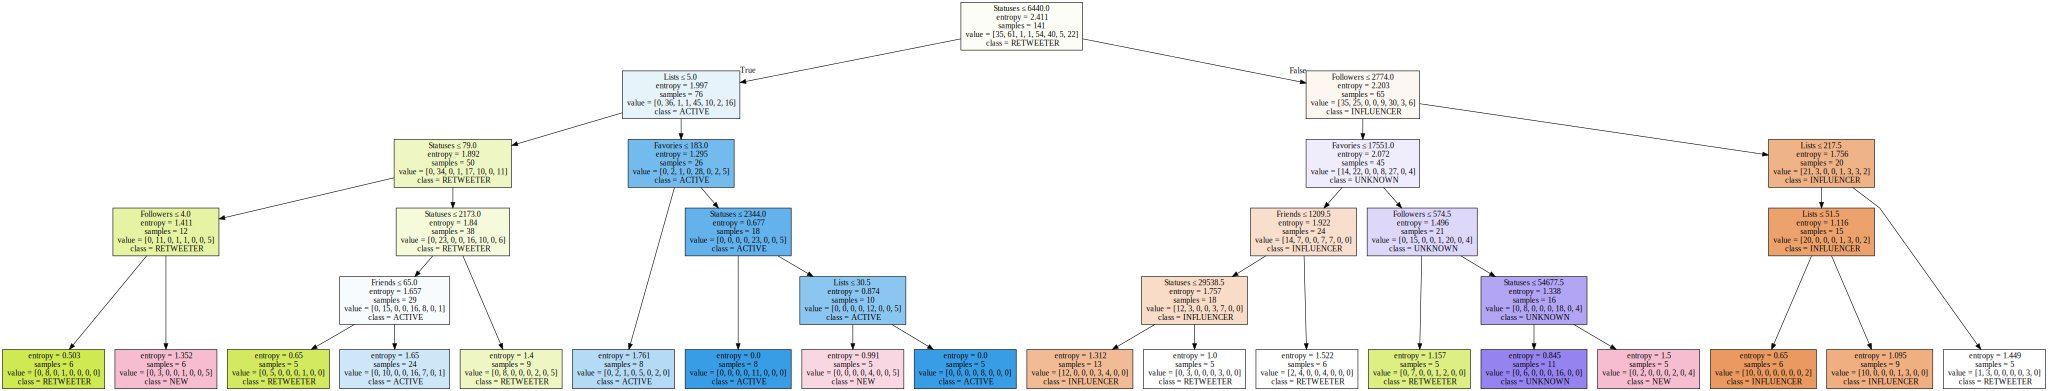

In [444]:
g[0]

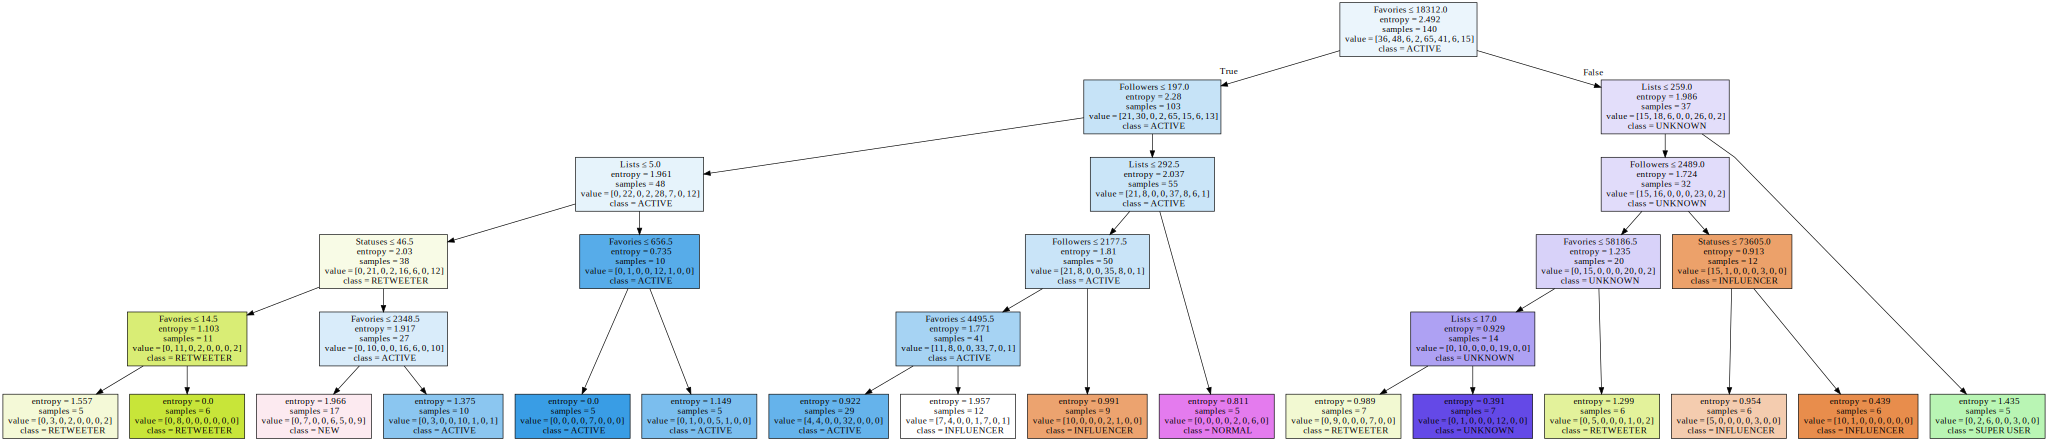

In [445]:
g[1]

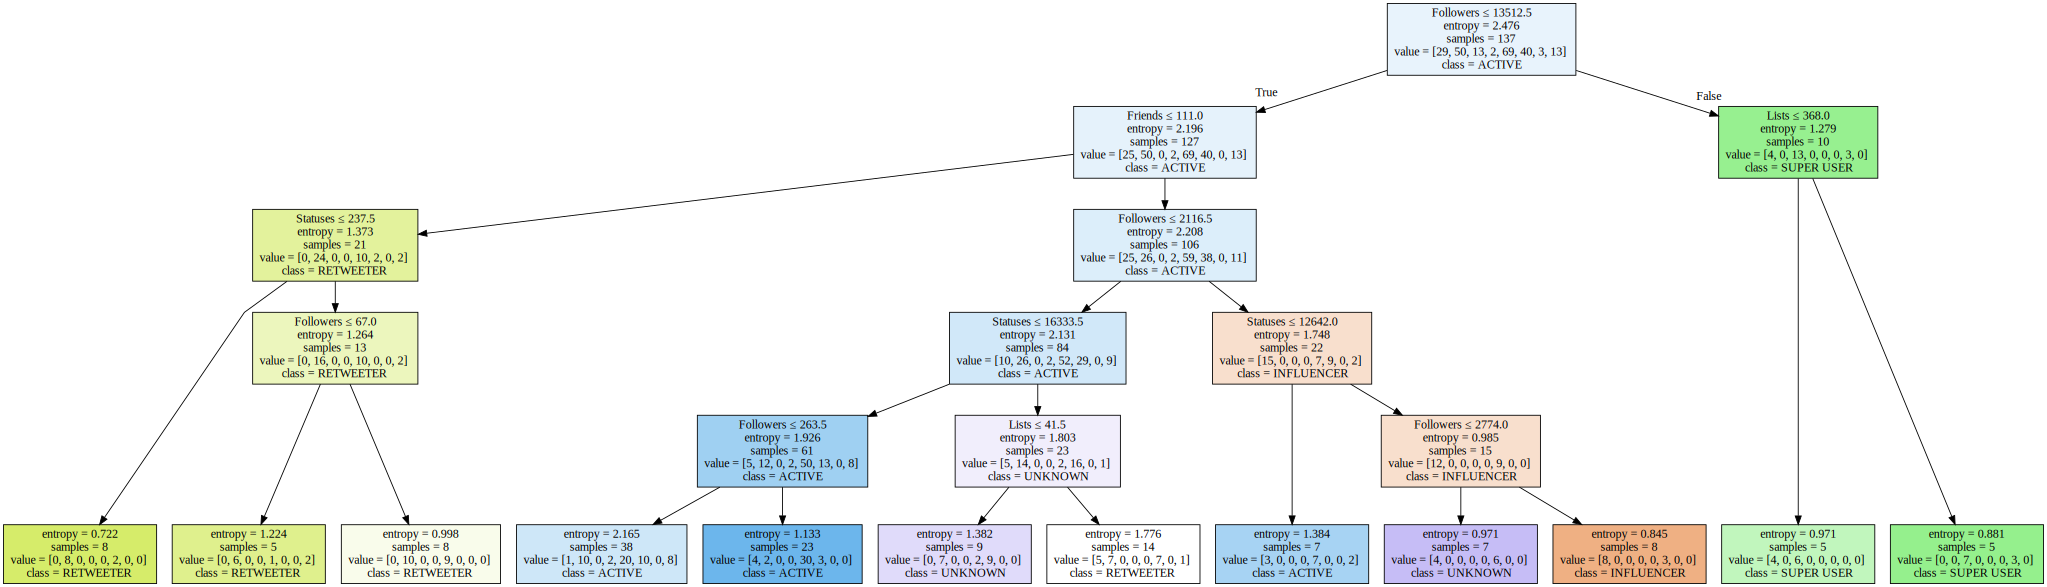

In [446]:
g[2]

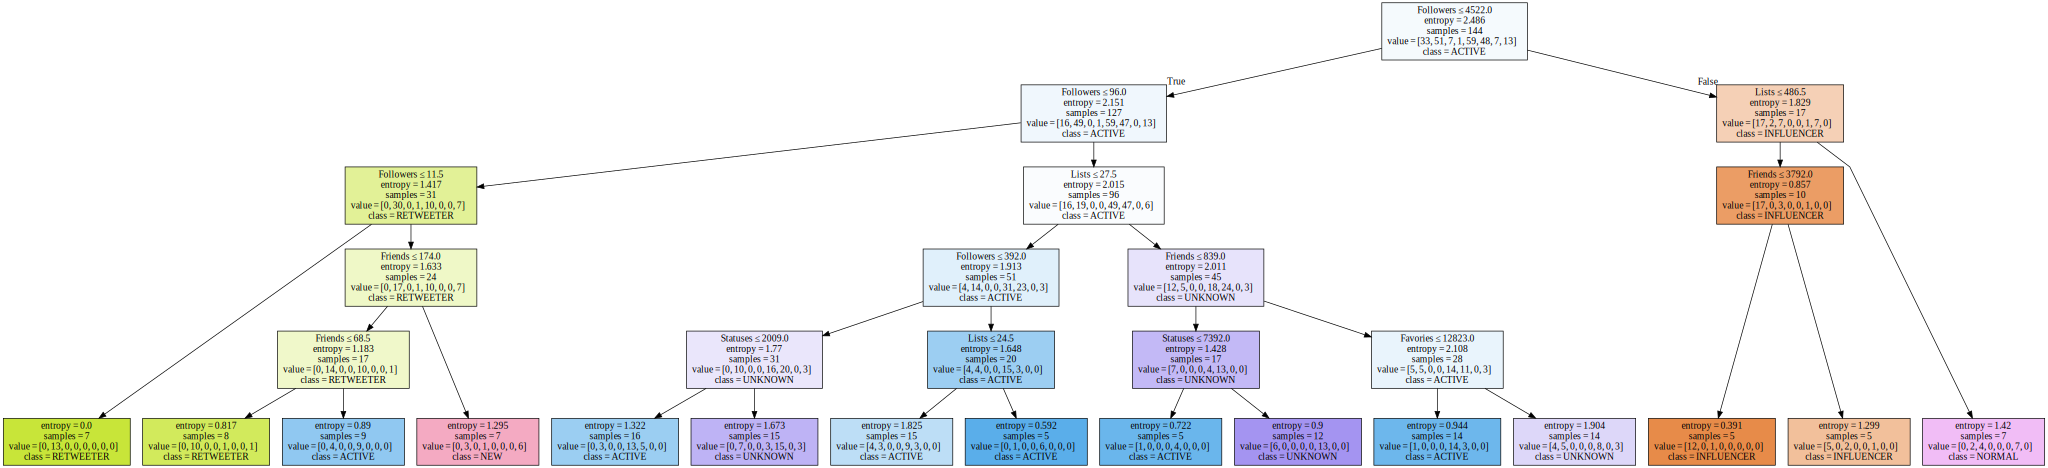

In [447]:
g[3]

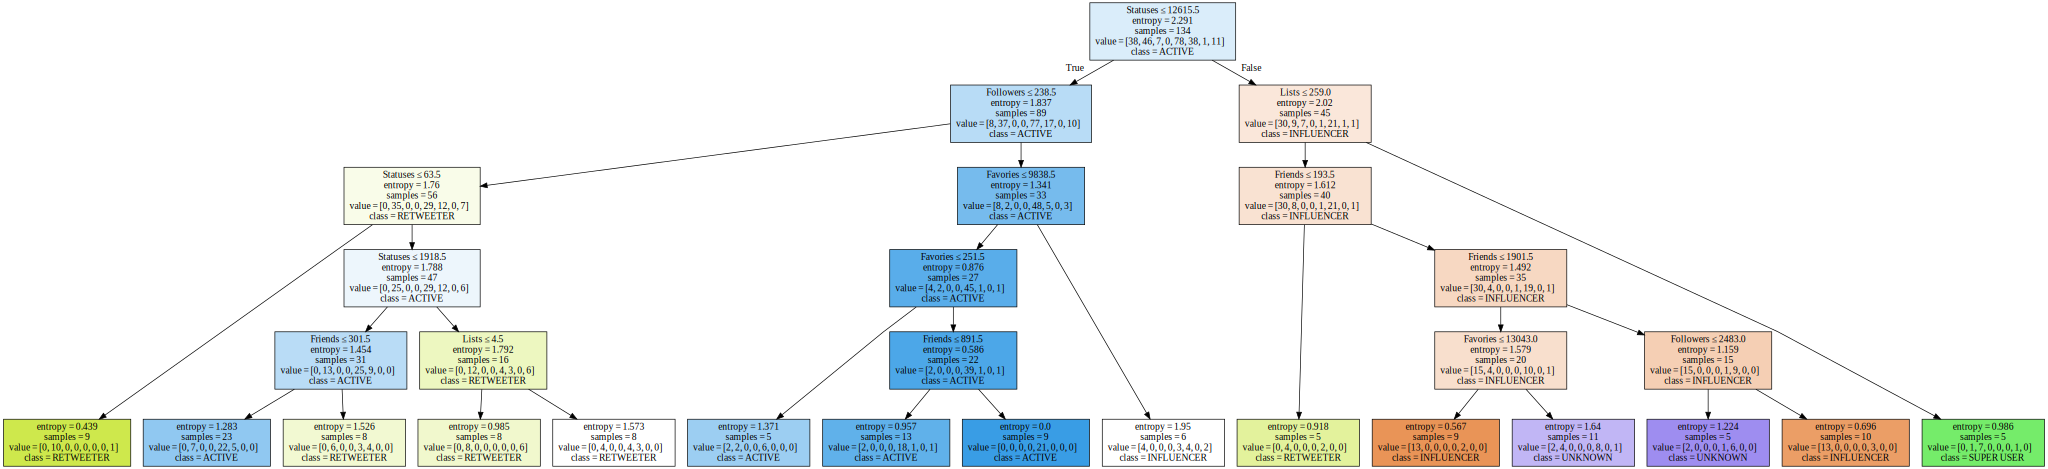

In [448]:
g[4]